
# (1) Introduction
This project deals with the notion of using artificial neural networks in order to predict the chances of a person getting into the master's degree of a university, based on some critical factors such as the test scores and if that person had any research experience. More information on the dataset will be included below. This project is a failure of a project not because of the weak neural network but also because of the lack of data. This dataset, [extracted](https://www.kaggle.com/mohansacharya/graduate-admissions?select=Admission_Predict_Ver1.1.csv) from Kaggle, contains 5000 people and their scores. No scaling of the data was required. Below is some information of the paramaters.


---

Independent Values:

| Feature Name      | Description |
| ----------- | ----------- |
|    GRE Score   | Grade Record Examination Score (out of 340)       |
| TOEFL   | Test of English as a Foreign Language (out of 120)        |
|    University Rating   | The rating of the university (out of 5)      |
|    Statement Of Purpose Strength   | Determines the statement of purpose strength (0-5)       |
|    Letter Of Recommendation Strength   | The strength of the LOA (0-5)       |
|    Undergraduate GPA   | The grade per average of the undergrad (out of 10)      |
|    Research experience   | Does the personhave research experience??? (1- yes, 0-no)       |


---

Dependent Value:

| Feature Name      | Description |
| ----------- | ----------- |
|    Chance Of Admit   | The chances in percentage the person applying is admitted.       |


# (2) Importing the libraries

Below mentioned are the necessary libraries required to carry on the task.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# (3) Data Preprocessing
Data is extracted from the CSV file "Admission_Predict_Ver1.1.csv" using the pandas library. A Scaler is applied as usual as we are applying the artificial neural network on a set of numbered values. Heavy scaling is not necessary due to the fact that all the values in the dataset were already numbers. For more info on artificial neural networks, check out my GitHub post [here](https://github.com/codemasterady/Phone-Price-Predictor/blob/main/About_The_Model.ipynb).

In [2]:
# Data Preprocessing
data_set = pd.read_csv(
    r'Admission_Predict_Ver1.1.csv')
independent_variables = data_set.iloc[:, 1:8].values
dependent_variable = data_set.iloc[:, -1].values
# Scaling the data
scaler = StandardScaler()
scaled_independent_variables = scaler.fit_transform(
    independent_variables)

# (4) Defining the model
After experimentation of multiple possible combinations of models, I have found out this to be more accurate of the bunch.

## (4)(a)Explanation
This model contains **1** input layer, **5** hidden layers, **1** output layer and **2** dropout units which makes a grand total of 7 layers. This model uses the standard ReLU activation function for the input and hidden layers and a sigmoid layer for the final output layer as this problem is a **regression** problem. The Stochastic gradient descent method was used to calculate the minimum cost for the model and the **mean-squared-error** or the mse, as stated in the code, was the metric used to calculate the cost. For those not familiar with the mse cost metric, the mean squared error is the mean of the sum of the difference in the predicted value and the actual value squared. Click [here](https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220) for more on cost functions. Different values of the epochs and batch size were tested until the lowest value for the mse was reached. Droupout was implemented as I had noticed that the prediction was highly dependent on some paramaters.


In [3]:
X, y = scaled_independent_variables, dependent_variable
# Defining the neural network
nn = Sequential()
nn.add(Dense(units=200, activation='relu'))
nn.add(Dense(units=100, activation='relu'))
nn.add(Dropout(rate=0.3))
nn.add(Dense(units=50, activation='relu'))
nn.add(Dense(units=25, activation='relu'))
nn.add(Dense(units=12, activation='relu'))
nn.add(Dense(units=6, activation='relu'))
nn.add(Dropout(rate=0.6))
nn.add(Dense(units=1, activation='sigmoid'))
nn.compile(optimizer='adam', loss='mse')
nn.fit(X, y, batch_size=60, epochs=40)

Epoch 1/40
9/9 [==============================] - 0s 3ms/step - loss: 0.0651
Epoch 2/40
9/9 [==============================] - 0s 3ms/step - loss: 0.0543
Epoch 3/40
9/9 [==============================] - 0s 2ms/step - loss: 0.0398
Epoch 4/40
9/9 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 5/40
9/9 [==============================] - 0s 2ms/step - loss: 0.0258
Epoch 6/40
9/9 [==============================] - 0s 2ms/step - loss: 0.0307
Epoch 7/40
9/9 [==============================] - 0s 2ms/step - loss: 0.0285
Epoch 8/40
9/9 [==============================] - 0s 3ms/step - loss: 0.0302
Epoch 9/40
9/9 [==============================] - 0s 3ms/step - loss: 0.0273
Epoch 10/40
9/9 [==============================] - 0s 3ms/step - loss: 0.0242
Epoch 11/40
9/9 [==============================] - 0s 3ms/step - loss: 0.0251
Epoch 12/40
9/9 [==============================] - 0s 3ms/step - loss: 0.0248
Epoch 13/40
9/9 [==============================] - 0s 3ms/step - loss: 0.

## (4)(b) Trials
Below is all the trials and the sample models I have experimented the model through.


```
"""
                            Testing All The Possible Outcomes (Performance Report)
#! Initial Model
====================================================================================================================
X, y = self.__preprocess()
# Defining the neural network
self.nn.add(Dense(units=100, activation='relu'))
self.nn.add(Dense(units=50, activation='relu'))
self.nn.add(Dense(units=25, activation='relu'))
self.nn.add(Dense(units=12, activation='relu'))
self.nn.add(Dense(units=1, activation='sigmoid'))
self.nn.compile(optimizer='adam', loss='mse')
self.nn.fit(X, y, batch_size=50, epochs=40)
====================================================================================================================
#! Test A (Best Case)
input_arr = [340, 120, 5, 5, 5,  10, 1]
obj.mainTrain()
print(
    f"Best Case Scenario Has A Probability Of {str(obj.predictChances(input_arr))}")
#! Returned 1.0 (PASSED)
--------------------------------------------------------------------------------------------------------------------
#! Test B (Worst Case) (With Research)
input_arr = [0, 0, 5, 0, 0,  1, 0]
obj.mainTrain()
print(
    f"Worst Case Scenario Has A Probability Of {str(obj.predictChances(input_arr))}")
#! Returned 0.87353826 (FAILED)
--------------------------------------------------------------------------------------------------------------------
#! Test C (Average Case)
input_arr = [270, 60, 3, 3, 3,  1, 0]
obj.mainTrain()
print(
    f"Average Case Scenario Has A Probability Of {str(obj.predictChances(input_arr))}")
#! Returned 1.0 (Unknown)
--------------------------------------------------------------------------------------------------------------------
#! Test D (Average Case) (No Research)
input_arr = [270, 60, 3, 3, 3,  0, 0]
obj.mainTrain()
print(
    f"Average Case Scenario Has A Probability Of {str(obj.predictChances(input_arr))}")
#! Returned 1.0
--------------------------------------------------------------------------------------------------------------------
#! Test E (Worst Case)
input_arr = [0, 0, 5, 0, 0,  0, 0]
obj.mainTrain()
print(
    f"Average Case Scenario Has A Probability Of {str(obj.predictChances(input_arr))}")
#! Returned 0.8089772
--------------------------------------------------------------------------------------------------------------------
#! Test F (Worst Case) (With Bad University)
input_arr = [0, 0, 1, 0, 0,  0, 0]
obj.mainTrain()
print(
    f"Average Case Scenario Has A Probability Of {str(obj.predictChances(input_arr))}")
#! Returned 0.6375988
--------------------------------------------------------------------------------------------------------------------
#! Test G (Worst Case) (With Bad University) (With research)
input_arr = [0, 0, 1, 0, 0,  1, 0]
obj.mainTrain()
print(
    f"Average Case Scenario Has A Probability Of {str(obj.predictChances(input_arr))}")
#! Returned 0.74066675
--------------------------------------------------------------------------------------------------------------------
#! Test H (Average Case) (With Bad University)
input_arr = [270, 60, 1, 3, 3,  0, 0]
obj.mainTrain()
print(
    f"Average Case Scenario Has A Probability Of {str(obj.predictChances(input_arr))}")
#! Returned 1.
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

#! Model B
====================================================================================================================
nn = Sequential()
nn.add(Dense(units=200, activation='relu'))
nn.add(Dense(units=100, activation='relu'))
nn.add(Dense(units=50, activation='relu'))
nn.add(Dropout(rate=0.3))
nn.add(Dense(units=25, activation='relu'))
nn.add(Dense(units=12, activation='relu'))
nn.add(Dense(units=6, activation='relu'))
nn.add(Dropout(rate=0.6))
nn.add(Dense(units=1, activation='sigmoid'))
nn.compile(optimizer='adam', loss='mse')
====================================================================================================================
#! Test A (Best Case)
input_arr = [340, 120, 5, 5, 5,  10, 1]
obj.mainTrain()
print(
    f"Best Case Scenario Has A Probability Of {str(obj.predictChances(input_arr))}")
#! Returned 1.0 (PASSED)
--------------------------------------------------------------------------------------------------------------------
#! Test B (Worst Case) (With Research)
input_arr = [0, 0, 5, 0, 0,  1, 0]
obj.mainTrain()
print(
    f"Worst Case Scenario Has A Probability Of {str(obj.predictChances(input_arr))}")
#! Returned 0.73658943 (Improvement)
--------------------------------------------------------------------------------------------------------------------
#! Test C (Average Case)
input_arr = [270, 60, 3, 3, 3,  1, 0]
obj.mainTrain()
print(
    f"Average Case Scenario Has A Probability Of {str(obj.predictChances(input_arr))}")
#! Returned 1.0 (Unknown)
--------------------------------------------------------------------------------------------------------------------
#! Test D (Average Case) (No Research)
input_arr = [270, 60, 3, 3, 3,  0, 0]
obj.mainTrain()
print(
    f"Average Case Scenario Has A Probability Of {str(obj.predictChances(input_arr))}")
#! Returned 1.0
--------------------------------------------------------------------------------------------------------------------
#! Test E (Worst Case)
input_arr = [0, 0, 5, 0, 0,  0, 0]
obj.mainTrain()
print(
    f"Average Case Scenario Has A Probability Of {str(obj.predictChances(input_arr))}")
#! Returned 0.7697712 (Improvement)
--------------------------------------------------------------------------------------------------------------------
#! Test F (Worst Case) (With Bad University)
input_arr = [0, 0, 1, 0, 0,  0, 0]
obj.mainTrain()
print(
    f"Average Case Scenario Has A Probability Of {str(obj.predictChances(input_arr))}")
#! Returned 0.64155287 (Better??)
--------------------------------------------------------------------------------------------------------------------
#! Test G (Worst Case) (With Bad University) (With research)
input_arr = [0, 0, 1, 0, 0,  1, 0]
obj.mainTrain()
print(
    f"Average Case Scenario Has A Probability Of {str(obj.predictChances(input_arr))}")
#! Returned 0.7250743 (Improvement)
--------------------------------------------------------------------------------------------------------------------
#! Test H (Average Case) (With Bad University)
input_arr = [270, 60, 1, 3, 3,  0, 0]
obj.mainTrain()
print(
    f"Average Case Scenario Has A Probability Of {str(obj.predictChances(input_arr))}")
#! Returned 1.
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

#! Model C (Best Model)
====================================================================================================================
self.nn.add(Dense(units=200, activation='relu'))
self.nn.add(Dense(units=100, activation='relu'))
self.nn.add(Dropout(rate=0.3))
self.nn.add(Dense(units=50, activation='relu'))
self.nn.add(Dense(units=25, activation='relu'))
self.nn.add(Dense(units=12, activation='relu'))
self.nn.add(Dense(units=6, activation='relu'))
self.nn.add(Dropout(rate=0.6))
self.nn.add(Dense(units=1, activation='sigmoid'))
self.nn.compile(optimizer='adam', loss='mse')
self.nn.fit(X_train, y_train, batch_size=60, epochs=40)
====================================================================================================================
#! Test A (Best Case)
input_arr = [340, 120, 5, 5, 5,  10, 1]
obj.mainTrain()
print(
    f"Best Case Scenario Has A Probability Of {str(obj.predictChances(input_arr))}")
#! Returned 1.0 (PASSED)
--------------------------------------------------------------------------------------------------------------------
#! Test B (Worst Case) (With Research)
input_arr = [0, 0, 5, 0, 0,  1, 0]
obj.mainTrain()
print(
    f"Worst Case Scenario Has A Probability Of {str(obj.predictChances(input_arr))}")
#! Returned 0.71924317 (Improvement)
--------------------------------------------------------------------------------------------------------------------
#! Test C (Average Case)
input_arr = [270, 60, 3, 3, 3,  1, 0]
obj.mainTrain()
print(
    f"Average Case Scenario Has A Probability Of {str(obj.predictChances(input_arr))}")
#! Returned 1.0 (Unknown)
--------------------------------------------------------------------------------------------------------------------
#! Test D (Average Case) (No Research)
input_arr = [270, 60, 3, 3, 3,  0, 0]
obj.mainTrain()
print(
    f"Average Case Scenario Has A Probability Of {str(obj.predictChances(input_arr))}")
#! Returned 1.0
--------------------------------------------------------------------------------------------------------------------
#! Test E (Worst Case)
input_arr = [0, 0, 5, 0, 0,  0, 0]
obj.mainTrain()
print(
    f"Average Case Scenario Has A Probability Of {str(obj.predictChances(input_arr))}")
#! Returned 0.70957875 (Improvement)
--------------------------------------------------------------------------------------------------------------------
#! Test F (Worst Case) (With Bad University)
input_arr = [0, 0, 1, 0, 0,  0, 0]
obj.mainTrain()
print(
    f"Average Case Scenario Has A Probability Of {str(obj.predictChances(input_arr))}")
#! Returned 0.64277405 (Better)
--------------------------------------------------------------------------------------------------------------------
#! Test G (Worst Case) (With Bad University) (With research)
input_arr = [0, 0, 1, 0, 0,  1, 0]
obj.mainTrain()
print(
    f"Average Case Scenario Has A Probability Of {str(obj.predictChances(input_arr))}")
#! Returned 0.74086756 (Improvement??)
--------------------------------------------------------------------------------------------------------------------
#! Test H (Average Case) (With Bad University)
input_arr = [270, 60, 1, 3, 3,  0, 0]
obj.mainTrain()
print(
    f"Average Case Scenario Has A Probability Of {str(obj.predictChances(input_arr))}")
#! Returned 1.
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
"""
```



# (5) Data Post Processing
This section deals with the post-processing of the final calculated data. It evaluates the performance of the data based on train_test_split. Now you might have noticed that this notebook does not have a train_test_split. That is due to the fact that when I was making this project my **NeuralEngine** class had a method called performanceEvaluation that uses the Sklearn library to split the X and y data into **X_train, X_test, y_train, y_test** accordingly. This was done to avoid the plotting of the data when the model is used for future predictions. The code for the performanceEvaluation method is given blow although I strongly suggest you look at the [code](https://github.com/codemasterady/Predicting-Your-Chance-Of-Admission-For-A-Masters-Degree/blob/main/models/neural_engine.py) in raw.


```
def performanceEvaluation(self):
        X, y = self.__preprocess()
        # Splitting the data into the training and the test set for model performance evaluation
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3)
        # Defining the neural network
        eval_nn = Sequential()
        eval_nn.add(Dense(units=200, activation='relu'))
        eval_nn.add(Dense(units=100, activation='relu'))
        eval_nn.add(Dropout(rate=0.3))
        eval_nn.add(Dense(units=50, activation='relu'))
        eval_nn.add(Dense(units=25, activation='relu'))
        eval_nn.add(Dense(units=12, activation='relu'))
        eval_nn.add(Dense(units=6, activation='relu'))
        eval_nn.add(Dropout(rate=0.6))
        eval_nn.add(Dense(units=1, activation='sigmoid'))
        eval_nn.compile(optimizer='adam', loss='mse')
        eval_nn.fit(X_train, y_train, batch_size=60, epochs=40)
        # Extracting the evaluated values
        list_of_costs = []
        y_pred = eval_nn.predict(X_test)
        for i in range(0, 100):
            cost = y_test[i] - y_pred[i]
            # To ensure diff is always positive
            cost = abs(cost)
            list_of_costs.append(cost)
        # Plotting the results
        plt.plot(list_of_costs, 'r')
        plt.xlabel("Index (i)")
        plt.ylabel("Cost [Predicted value - Actual value] (%)")
        plt.show()
```



## (5)(a) Splitting the data into the training & test set

In [4]:
# Getting the X_test & y_test value
_, X_test, _, y_test = train_test_split(
            X, y, test_size=0.3)

## (5)(b) Plotting the performance.
The cell below evaluates the performance by getting the difference from the actual and the predicted and then plots the values in the graph, making it easier for us as humans to evaluate the performance. **Do note that for different runs, the performance varies**. Also, you can notice that the predictions were off by **18%**. This is important as later when making the GUI part of the project, we will get the output, add and subtract the variation, for special cases, ad get the average.

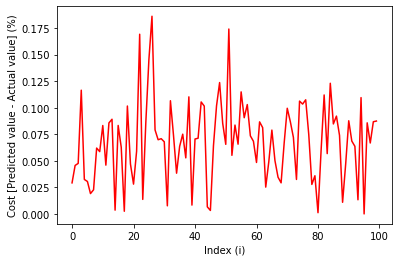

In [5]:
# The bottom code is inspired from performanceEvaluation.
list_of_costs = []
y_pred = nn.predict(X_test)
for i in range(0, 100):
    cost = y_test[i] - y_pred[i]
    # To ensure diff is always positive
    cost = abs(cost)
    list_of_costs.append(cost)
# Plotting the results
plt.plot(list_of_costs, 'r')
plt.xlabel("Index (i)")
plt.ylabel("Cost [Predicted value - Actual value] (%)")
plt.show()

# (6) The Graphical User Interface execution (Extras)
This section is just an extra as it helps you dive into the scoop of how the data that is input is cleaned before being fed into the model. Not much is mentioned as this notebook only goes through the**machine learning model**.

In [6]:
def execute():
    # Getting the values
    GRE = gre_entry.get()
    TOEFL = toefl_entry.get()
    UNIVERSITY_RATING = uni_rate_entry.get()
    STATEMENT_OF_PURPOSE_RATING = sop_entry.get()
    LETTER_OF_RECOMMENDATION_RATING = lor_entry.get()
    GPA = gpa_entry.get()
    RESEARCH_EXPERIENCE = r_e_entry.get()

    # Cleaning all the inputs
    GRE = int(GRE)
    TOEFL = int(TOEFL)
    UNIVERSITY_RATING = int(UNIVERSITY_RATING)
    STATEMENT_OF_PURPOSE_RATING = int(STATEMENT_OF_PURPOSE_RATING)
    LETTER_OF_RECOMMENDATION_RATING = int(LETTER_OF_RECOMMENDATION_RATING)
    GPA = int(GPA)
    RESEARCH_EXPERIENCE = int(RESEARCH_EXPERIENCE)
    
    # Deducing the final array
    returning_list = [GRE, TOEFL, UNIVERSITY_RATING, STATEMENT_OF_PURPOSE_RATING, LETTER_OF_RECOMMENDATION_RATING, GPA, RESEARCH_EXPERIENCE]
    
    # Defining the neural network
    # Initializing the neural engine object
    engine = NeuralEngine()
    # Getting the pred
    engine.mainTrain()
    chances_pred = engine.predictChances(returning_list)
    # Initializing the final output
    final_output = 0
    # Exaluating the outliers
    if chances_pred > 0.82:
        lower_bound = chances_pred - 0.18
        final_output = (chances_pred + lower_bound)/2
    elif chances_pred < 0.18:
        upper_bound = chances_pred + 0.18
        final_output = (chances_pred + upper_bound)/2
    else:
        lower_bound = chances_pred - 0.18
        upper_bound = chances_pred + 0.18
        final_output = (upper_bound + lower_bound + chances_pred)/3
    final_output = final_output - 0.60
    # Computing the score
    score = 0
    if final_output<0.3:
        score = final_output//3
    else:
        score = 10
    print(f"The Score Is {score}\nThe final output is {final_output}\nThe Predicted Probability {chances_pred}")
    # Executing the secondary GUI
    secondaryGUI(score)

# (7) Conclusion
Despite this model not having a very good accuracy, I believe it has a very good model that can be used to predict the chances of your friends getting into a masters degree. If you have a better dataset than I did to train the model, then feel free to [download](https://github.com/codemasterady/Predicting-Your-Chance-Of-Admission-For-A-Masters-Degree/archive/main.zip) this algorithm and train your data based on this algorithm.